## Dependecies required for the project setup.

What are the main dependencies required for this project, and why were they chosen? What additional setup steps, such as configuring environment variables, are necessary for the project? How can someone easily install the project dependencies?

In [6]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Files to Load
sneaker_data_to_load = Path("SNKR_DataProject.csv")
region_data_to_load = Path("States_By_Region.csv")

# Read sneaker data and store into Pandas DataFrames
sneaker_data = pd.read_csv(sneaker_data_to_load)
region_data = pd.read_csv(region_data_to_load)


## Combination of sneaker and region data. 

What is the size of the combined dataset?
What are the unique regions present in the combined data?
Can you identify any correlations between sneaker features and regions?

In [3]:
#Combine sneaker data and region data


## This represents the entire dataset. 

What is the overall size of the dataset? Is there any noticeable correlation between specific features in the dataset? How many unique regions are represented in the dataset?


In [4]:
# View data set
sneaker_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyers State
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


## Pie chart of popular brands of sneakers.

How might changes in the popularity of sneaker brands over time impact the market dynamics? Which brand has the largest market share according to the pie chart? What does the pie chart reveal about the market distribution of popular sneaker brands?

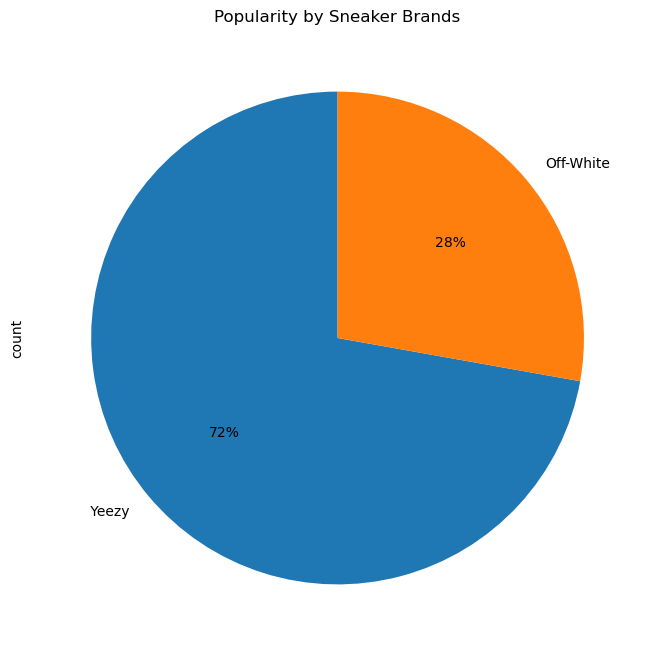

In [5]:
# Create a pie chart
plt.figure(figsize=(8,8))
sneaker_data ['Brand'].value_counts().plot(kind='pie',startangle=90, autopct='%1.0f%%')
plt.title('Popularity by Sneaker Brands')
plt.show()

sneaker_roi = (sneaker_data['Sale Price'] - sneaker_data['Retail Price']) / sneaker_data['Retail Price']

print(sneaker_roi)